## 3a

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image

In [17]:
class SingleLayerNN():
    def __init__(self, w1, b1, w2, b2, act1, act2):
        self.w1 = w1 # w1 - weights for the first layer | col vector | (m x 1) m is # of nodes in layer
        self.b1 = b1 # b - biases for the first layer  | col vector | (m x 1) m is # of nodes in layer
        self.w2 = w2 # w2 - weights for output layer | col vector | (m x 1) m is # of nodes in prev layer
        self.b2 = b2 # b2 - biases for the output layer  | col vector | (m x 1) m is # of nodes in layer
        self.act1 = act1 # activation function for the first layer
        self.act2 = act2 # activation function for the output layer
        
        self.param_dict = {'w1': self.w1,
                           'b1': self.b1,
                           'w2': self.w2,
                           'b2': self.b2}
    
    # is there a better way to do this?
    def set_param(self, param, val):
        if param == 'b2':
            b2 = val
        
    '''
    func for computing a forward pass through
    a  single  layer  of  the  network having 
    input layer size of 1

    x - input to layer | col vector | (m x 1) m is # of prev layer nodes
    '''
    def compute_first_layer(self, x):
        return self.act1(x*self.w1.T+self.b1.T)

    
    '''
    func for computing the output layer where
    the output is a single value

    x - input to layer | col vector | (m x 1) m is # of prev layer nodes
    act - activation function |
    '''
    def compute_output_layer(self, x):
        return self.act2(np.sum(x*self.w2.T, axis=1) + self.b2.T)
    
    def forward_pass(self, x):
        return self.compute_output_layer(self.compute_first_layer(x))

In [22]:

'''
This function will take a nn object and visualize
how the forward pass of the nn will change graphically
over a continous change in one (or multiple) of its
parameters. It will display a gif of the change in the 
graph.

param_to_change - the parameter of the neural network that will be continously changed and observed
param_change_range - the range around the current value of which the change will occur
param_change_points - the number of points being made for the continous change. This will also be the
                      number of forward passes computed and the number of frames in the gif
x_range - the range for the x values for the function and graph
x_points - the number of x values to include for that specific range
'''
def visualize_nn_params(nn,
                        param='b2', param_change_range=(-5,5), param_change_points=50,
                        x_range=(-10,10), x_points=1000):
    
    x_vals = np.arange(x_range[0], x_range[1], 1./(x_points/(x_range[1]-x_range[0]))).reshape(x_points,1)
    param_vals = np.arange(param_change_range[0], param_change_range[1], 1./(param_change_points/(param_change_range[1]-param_change_range[0]))).reshape(param_change_points,1)
    
    # one iteration will do the forward pass with the specifc x_vals and new param values and then get the graph
    
    images_list = []
    
    for i in range(param_change_points):
        
        # update the parameter
        nn.set_param(param, nn.param_dict[param] + param_vals[i])
        
        # do the forward pass
        y = nn.forward_pass(x_vals)
        
        # plotting and saving
        
        
        plt.plot(x_vals,y)
        plt.savefig(r'./image1.png')
        images_list.append(imageio.imread(r'./image1.png'))
    
    imageio.mimsave('./gif1.gif', images_list)
    with open(r'./gif1.gif','rb') as f:
        display(Image(data=f.read(), format='png'))
    

## Initializations

In [23]:
'''Sigmoid activation function'''
def act_sigmoid(x):
    return 1./(1.+math.e**-x)

'''relu activation function'''
def act_relu(x):
    return np.maximum(x, 0.0)

'''no activation function'''
def act_none(x):
    return x

In [24]:
# Initial weights and biases of the network for this specific example

w1 = np.asarray([5,5,2,2]).reshape(4,1)
b1 = np.asarray([-3,-1,-6,-8]).reshape(4,1)

w2 = np.asarray([-1,1,-1,1]).reshape(4,1)
b2 = np.asarray([0])

nn = SingleLayerNN(w1, b1, w2, b2, act_sigmoid, act_none)

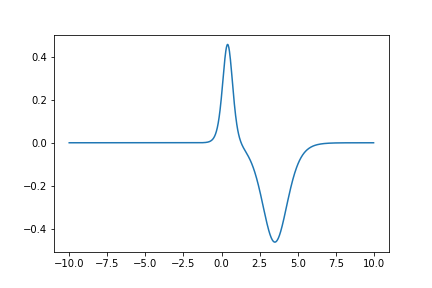

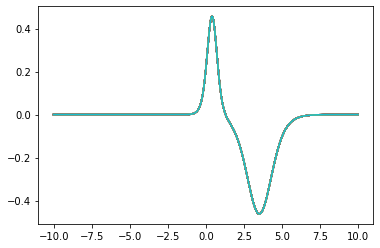

In [25]:
visualize_nn_params(nn)

### Layer Functions

In [5]:
'''
func for computing a forward pass through
a  single  layer  of  the  network having 
input layer size of 1

x - input to layer        | col vector | (m x 1) m is # of prev layer nodes
w - weights for the layer | col vector | (m x 1) m is # of nodes in layer
b - biases for the layer  | col vector | (m x 1) m is # of nodes in layer
act - activation function |
'''

def compute_one_layer(x, w, b, act):
    return act(x*w.T+b.T)

In [6]:
'''
func for computing the output layer where
the output is a single value

x - input to layer | col vector | (m x 1) m is # of prev layer nodes
w - weights for the layer | col vector | (m x 1) m is # of nodes in prev layer
b - biases for the layer  | col vector | (m x 1) m is # of nodes in layer
act - activation function |
'''

def compute_output_layer(x, w, b, act):
    return act(np.sum(x*w.T, axis=1) + b.T)

In [7]:
def forward_pass(x, w1, b1, w2, b2, act1, act2):
    return compute_output_layer(compute_one_layer(x, w1, b1, act1), w2, b2, act2)

### Initializations

In [29]:
# Range of -10 to 10 with 1000 values
x_vals = (((np.arange(1000) / 1000) * 20)-10.)
x_vals.shape

(1000,)

In [34]:
x_vals_test = np.arange(-10,10,1./50)
x_vals_test.shape

(1000,)

In [10]:
y1 = forward_pass(x_vals, w1, b1, w2, b2, act_sigmoid, act_none)
y2 = forward_pass(x_vals, w1, b1, w2, b2+1, act_sigmoid, act_none)
y3 = forward_pass(x_vals, w1, b1, w2, b2-1, act_sigmoid, act_none)

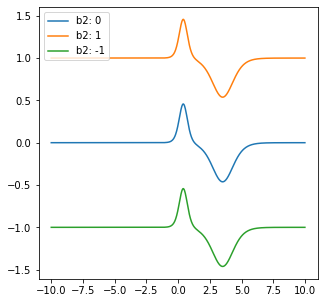

In [223]:
plt.figure(figsize=(5, 5))
plt.plot(x_vals, y1)
plt.plot(x_vals, y2)
plt.plot(x_vals, y3)
plt.legend(['b2: 0', 'b2: 1', 'b2: -1'], loc='upper left')

In [229]:
y1 = forward_pass(x_vals, w1, b1, w2, b2, act_sigmoid, act_none)
y2 = forward_pass(x_vals, w1, b1+5, w2, b2, act_sigmoid, act_none)
y3 = forward_pass(x_vals, w1, b1-5, w2, b2, act_sigmoid, act_none)

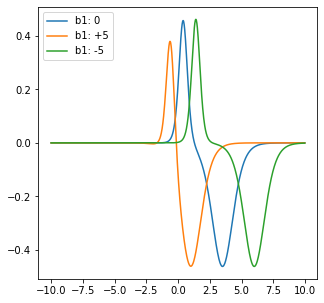

In [230]:
plt.figure(figsize=(5, 5))
plt.plot(x_vals, y1)
plt.plot(x_vals, y2)
plt.plot(x_vals, y3)
plt.legend(['b1: 0', 'b1: +5', 'b1: -5'], loc='upper left')